In [27]:
# checking data baisc strcture and basic statistics
import pandas as pd
train = pd.read_csv("/content/ECS 171/train.csv")
test = pd.read_csv("/content/ECS 171/test.csv")
print(train.info())
print(train.describe(include="all"))

na_percent = train.isna().mean() * 100
print(na_percent[na_percent > 0].sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

# 新段落

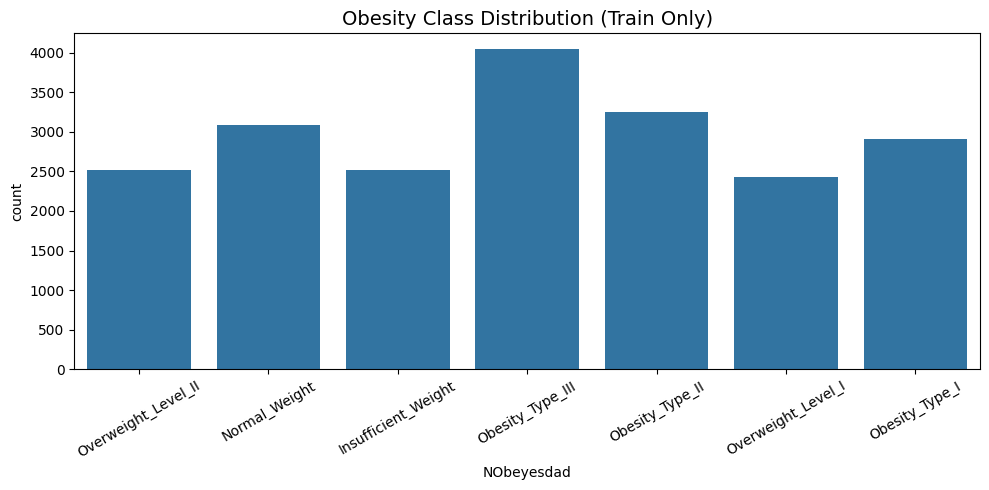

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.countplot(x="NObeyesdad", data=train)
plt.title("Obesity Class Distribution (Train Only)", fontsize=14)
plt.xticks(rotation=30, ha="center", fontsize=10)
plt.tight_layout()
plt.show()

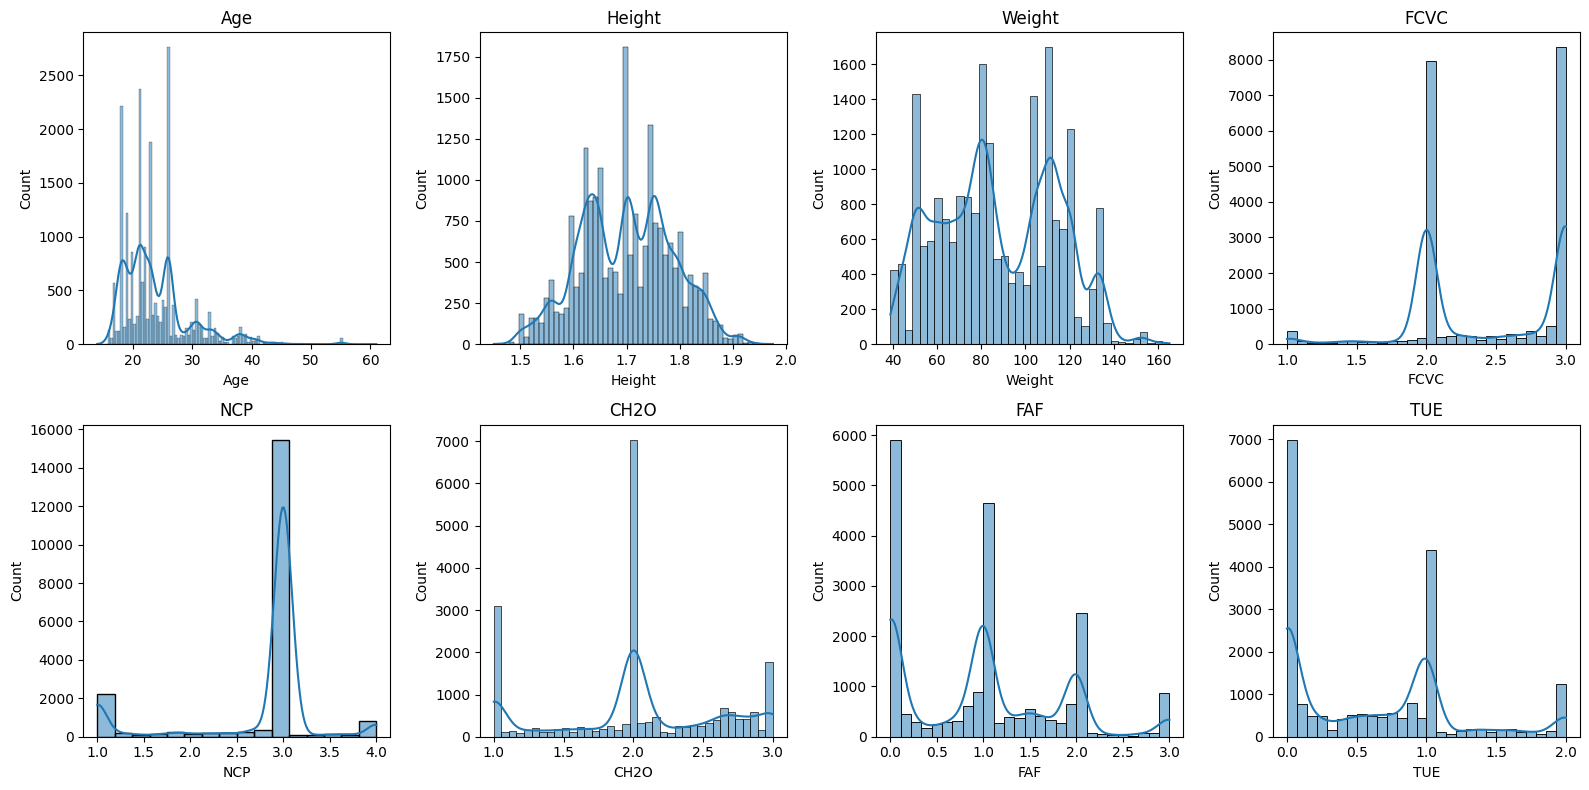

In [29]:
# numeric vars plot
plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)

sns.histplot(train["Age"], kde=True)

plt.title("Age")

plt.subplot(2, 4, 2)

sns.histplot(train["Height"], kde=True)

plt.title("Height")

plt.subplot(2, 4, 3)

sns.histplot(train["Weight"], kde=True)

plt.title("Weight")

plt.subplot(2, 4, 4)

sns.histplot(train["FCVC"], kde=True)

plt.title("FCVC")

plt.subplot(2, 4, 5)

sns.histplot(train["NCP"], kde=True)

plt.title("NCP")

plt.subplot(2, 4, 6)

sns.histplot(train["CH2O"], kde=True)

plt.title("CH2O")

plt.subplot(2, 4, 7)

sns.histplot(train["FAF"], kde=True)

plt.title("FAF")

plt.subplot(2, 4, 8)

sns.histplot(train["TUE"], kde=True)

plt.title("TUE")

plt.tight_layout()

plt.show()

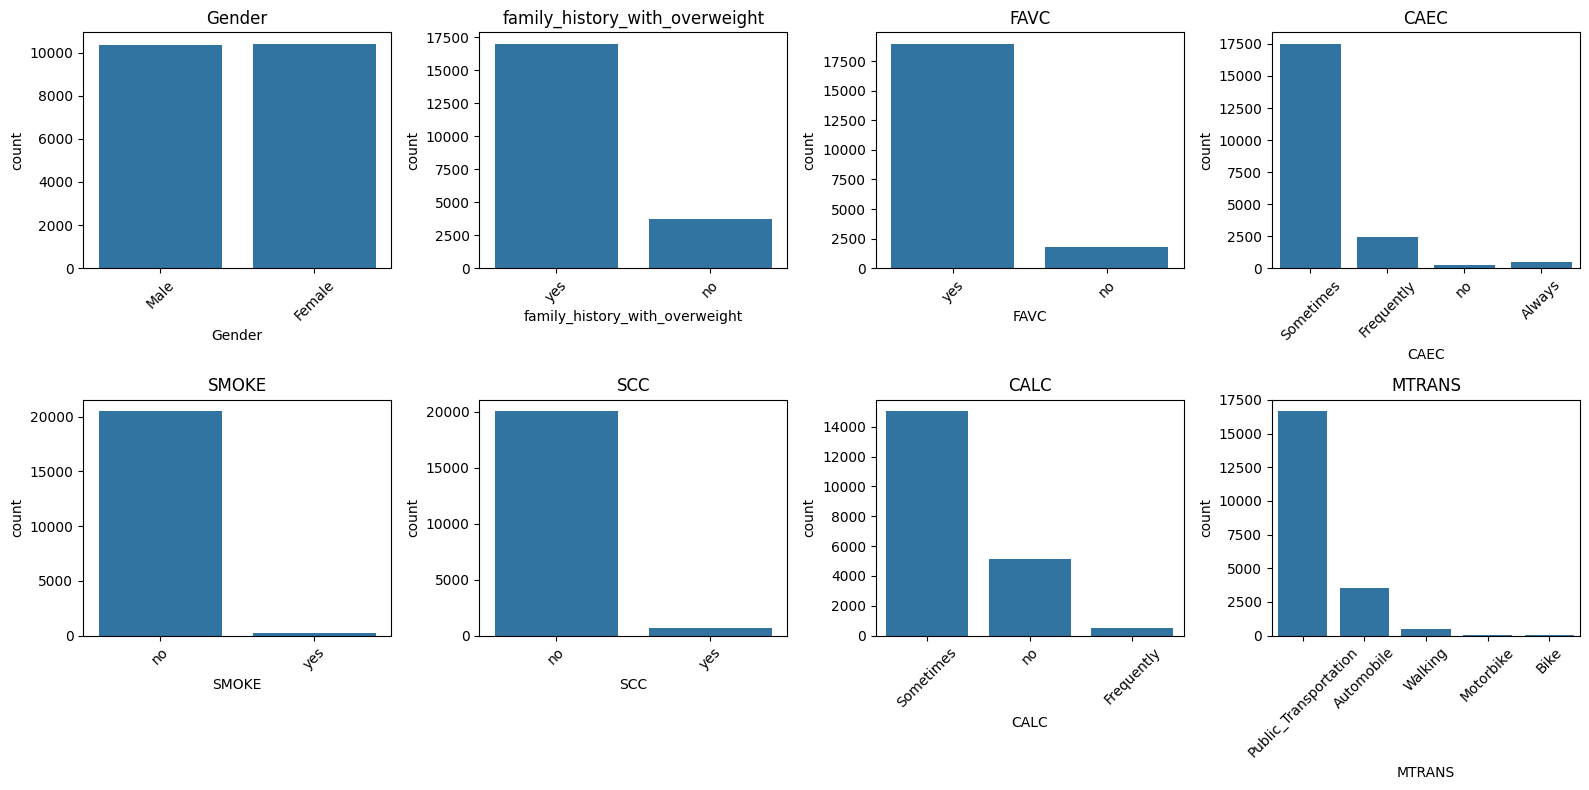

In [30]:
# categoria vars plot
plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
sns.countplot(x="Gender", data=train)
plt.title("Gender")
plt.xticks(rotation=45)

plt.subplot(2, 4, 2)
sns.countplot(x="family_history_with_overweight", data=train)
plt.title("family_history_with_overweight")
plt.xticks(rotation=45)

plt.subplot(2, 4, 3)
sns.countplot(x="FAVC", data=train)
plt.title("FAVC")
plt.xticks(rotation=45)

plt.subplot(2, 4, 4)
sns.countplot(x="CAEC", data=train)
plt.title("CAEC")
plt.xticks(rotation=45)

plt.subplot(2, 4, 5)
sns.countplot(x="SMOKE", data=train)
plt.title("SMOKE")
plt.xticks(rotation=45)

plt.subplot(2, 4, 6)
sns.countplot(x="SCC", data=train)
plt.title("SCC")
plt.xticks(rotation=45)

plt.subplot(2, 4, 7)
sns.countplot(x="CALC", data=train)
plt.title("CALC")
plt.xticks(rotation=45)

plt.subplot(2, 4, 8)
sns.countplot(x="MTRANS", data=train)
plt.title("MTRANS")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [31]:
# Outliner detection
print("\n=== Z-score outlier detection ===")
from scipy.stats import zscore
z_scores = train[numeric_vars].apply(zscore)

for col in numeric_vars:
    count = len(train[abs(z_scores[col]) > 3])
    print(f"{col}: {count} outliers")


=== Z-score outlier detection ===
Age: 275 outliers
Height: 4 outliers
Weight: 0 outliers
FCVC: 0 outliers
NCP: 0 outliers
CH2O: 0 outliers
FAF: 0 outliers
TUE: 0 outliers


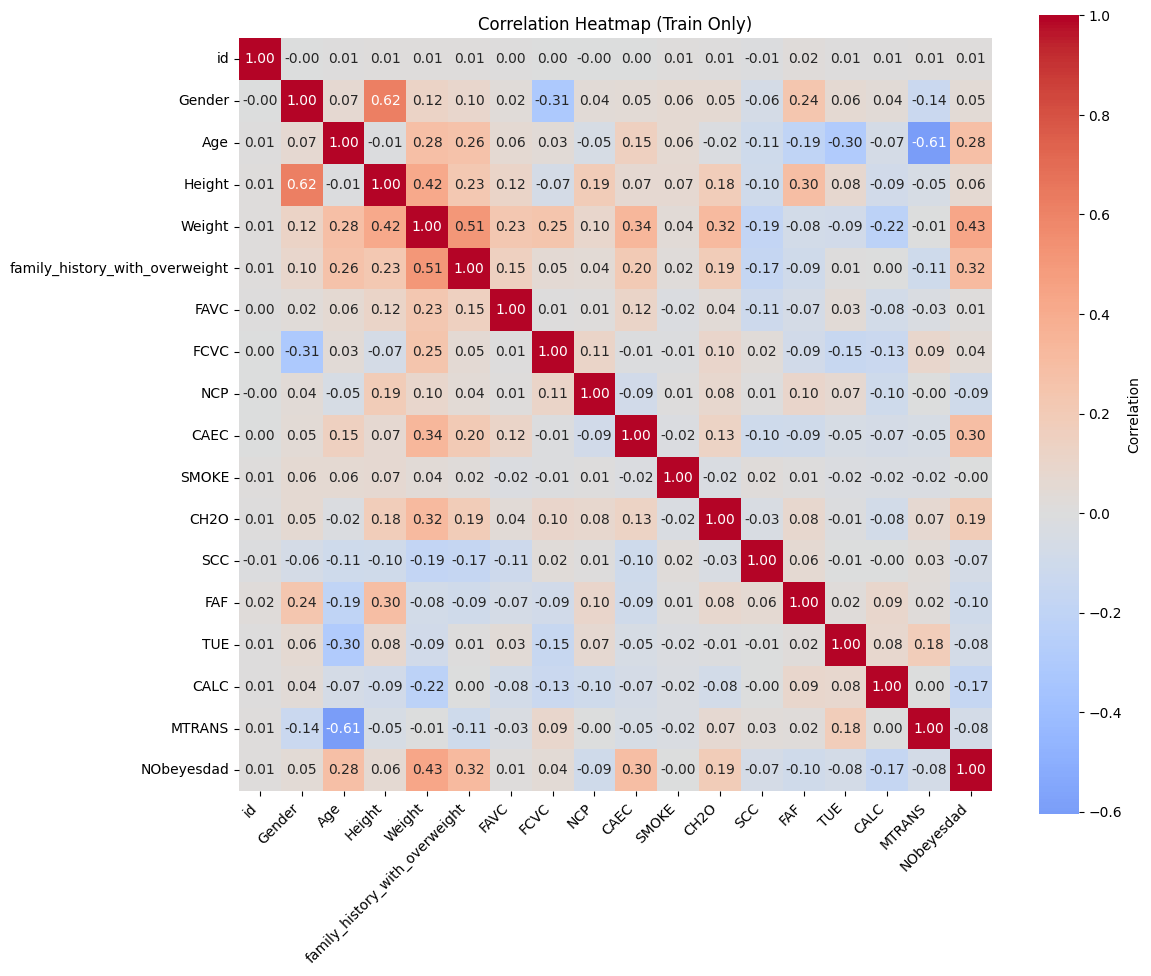

In [32]:
# Correlation map
df_encoded = train.copy()

for col in df_encoded.select_dtypes("object").columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

corr = df_encoded.corr(numeric_only=False)

plt.figure(figsize=(12, 10))

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"label": "Correlation"}
)

plt.title("Correlation Heatmap (Train Only)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
target_col = "NObeyesdad"
numeric_vars = ["Age","Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
categorical_vars = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
drop_cols = ["id"]
for c in drop_cols:
    if c in train.columns:
        train = train.drop(columns=c)
X_raw = train.drop(columns=[target_col])
y = train[target_col]
X = pd.get_dummies(X_raw, columns=categorical_vars, drop_first=True)

In [ ]:
# Random Forest methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=123,
    n_jobs=-1
)
param_grid = {"max_features": ["sqrt", 0.3, 0.5]}
# K-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)
grid.fit(X, y)
print("Best params:", grid.best_params_)
print("CV best accuracy:", grid.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


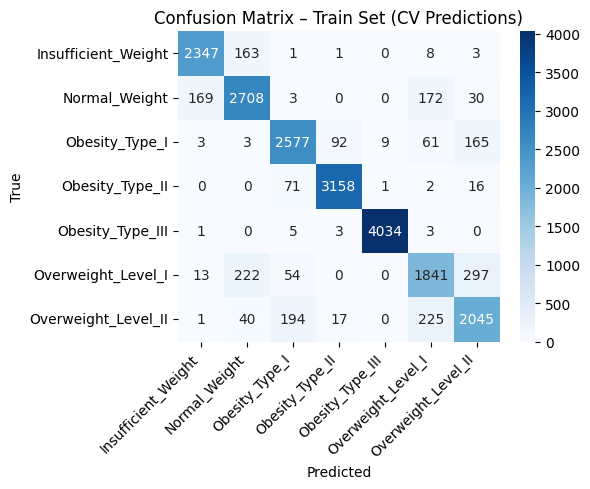

In [14]:
best_rf = grid.best_estimator_
y_pred_train = cross_val_predict(best_rf, X, y, cv=cv, n_jobs=-1)
cm = confusion_matrix(y, y_pred_train, labels=best_rf.classes_)
df_cm = pd.DataFrame(cm, index=best_rf.classes_, columns=best_rf.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Train Set (CV Predictions)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.93      0.93      2523
      Normal_Weight       0.86      0.88      0.87      3082
     Obesity_Type_I       0.89      0.89      0.89      2910
    Obesity_Type_II       0.97      0.97      0.97      3248
   Obesity_Type_III       1.00      1.00      1.00      4046
 Overweight_Level_I       0.80      0.76      0.78      2427
Overweight_Level_II       0.80      0.81      0.81      2522

           accuracy                           0.90     20758
          macro avg       0.89      0.89      0.89     20758
       weighted avg       0.90      0.90      0.90     20758

Cross-validated validation accuracy: 0.901339242701609
                               Feature  Importance
2                               Weight    0.444180
1                               Height    0.123937
8                          Gender_Male    0.100900
0                                  Age    0.081725
3               

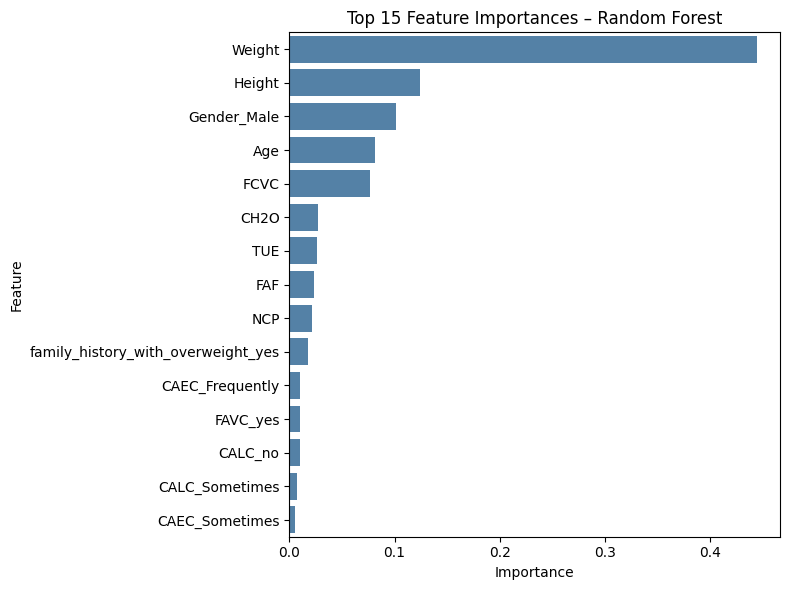

In [15]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict

# Ensure best_rf and y_pred_train are defined
best_rf = grid.best_estimator_
y_pred_train = cross_val_predict(best_rf, X, y, cv=cv, n_jobs=-1)

print(classification_report(y, y_pred_train))

val_acc = accuracy_score(y, y_pred_train)
print("Cross-validated validation accuracy:", val_acc)
best_rf.fit(X, y)

importances = best_rf.feature_importances_
feat_names = X.columns

imp_df = pd.DataFrame({
    "Feature": feat_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print(imp_df.head(20))

plt.figure(figsize=(8,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=imp_df.head(15),
    color="steelblue"
)
plt.title("Top 15 Feature Importances – Random Forest")
plt.tight_layout()
plt.show()

In [26]:
X_test_raw = test.copy()
X_test_enc = pd.get_dummies(X_test_raw, columns=categorical_vars, drop_first=True)

X_test_enc = X_test_enc.reindex(columns=X.columns, fill_value=0)

test_pred = best_rf.predict(X_test_enc)

# 5. Create Kaggle submission file
submission = pd.DataFrame({
    "id": test["id"],
    "NObeyesdad": test_pred
})

submission.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv
